In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def assign(dataset, centroids):
    """
    Time complexity: O(K*N)
    """
    K = len(centroids)
    clusters = [[] for _ in range(K)]
    assigned = [np.sum((np.tile(d, (K, 1)) - centroids)**2,
                       axis=1).argmin() for d in dataset]
    for i, c in enumerate(assigned):
        clusters[c].append(dataset[i])
    return list(map(np.array, clusters))


def update(clusters):
    """
    Time complexity: O(N)
    """
    return [c.mean(axis=0) for c in clusters]


def compare(centroids1, centroids2):
    """
    Time complexity: O(K)
    """
    K = len(centroids1)
    for i in range(K):
        if (centroids1[i] == centroids2[i]).min() == False:
            return False
    return True

In [38]:
K = 3
columns = ['instrumentalness', 'liveness']
df = pd.read_csv('./dataset/spotify.csv')[columns]
dataset = df.to_numpy()
seeds = [x for x in range(0, len(df), len(df)//K)][:K]
centroids = dataset[seeds]

In [39]:
# K-means Method
old_centroids = [np.random.rand(len(columns)) for _ in range(K)]
old_clusters = [[] for _ in range(K)]
new_centroids = centroids
new_clusters = assign(dataset, centroids)

t = 0
while not compare(old_centroids, new_centroids):
    print(f'{t}/ old: {old_centroids[0]}..., new: {new_centroids[0]}...')
    t += 1
    old_centroids = new_centroids
    old_clusters = new_clusters
    new_centroids = update(new_clusters)
    new_clusters = assign(dataset, new_centroids)
clusters = new_clusters
centroids = new_centroids

0/ old: [0.76091902 0.8848501 ]..., new: [0.     0.0653]...
1/ old: [0.     0.0653]..., new: [0.01836564 0.0603025 ]...
2/ old: [0.01836564 0.0603025 ]..., new: [0.00262637 0.10476495]...
3/ old: [0.00262637 0.10476495]..., new: [0.01028091 0.11550531]...
4/ old: [0.01028091 0.11550531]..., new: [0.01372377 0.12019376]...
5/ old: [0.01372377 0.12019376]..., new: [0.01458223 0.12246469]...
6/ old: [0.01458223 0.12246469]..., new: [0.01470529 0.12375378]...
7/ old: [0.01470529 0.12375378]..., new: [0.01469616 0.12436723]...
8/ old: [0.01469616 0.12436723]..., new: [0.01470972 0.12458205]...
9/ old: [0.01470972 0.12458205]..., new: [0.01469935 0.12479148]...
10/ old: [0.01469935 0.12479148]..., new: [0.01470381 0.12480452]...


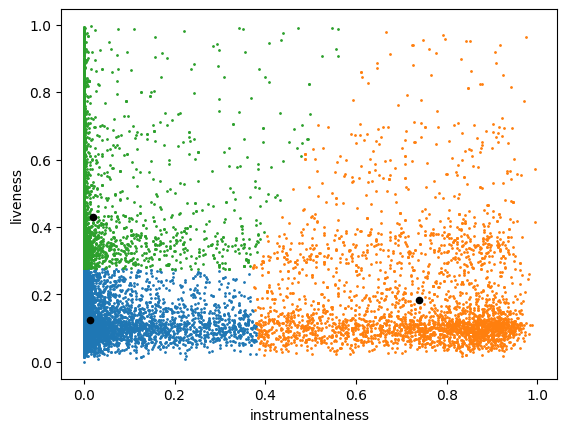

In [40]:
for c in clusters:
    plt.scatter(c.T[0], c.T[1], s=1)
for c in centroids:
    plt.scatter(c[0], c[1], s=20, c='black')
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()